#### 合成数据函数 synthetic_data

In [226]:
import torch

def synthetic_data(w, b, num_examples, std=0.01):
    """
    根据权重 w 和 偏置b 合成数据
    生成 num_examples 个数据样本
    """
    X = torch.normal(0, 1, (num_examples, len(w)), dtype=torch.float32)
    y = torch.matmul(X, w) + b
    # 再给 y 增加点噪音
    y += torch.normal(0, std, y.shape)
    return X, y.reshape(-1, 1)

#### 线性数据的权重 和 偏置项

In [227]:
true_w = torch.tensor([3], dtype=torch.float32)
true_b = torch.tensor([2], dtype=torch.float32)
true_w, true_b

(tensor([3.]), tensor([2.]))

#### 创建数据集

In [228]:
X, y = synthetic_data(true_w, true_b, 300, 1)

#### 绘制数据集

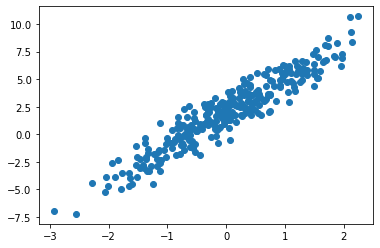

In [229]:
import matplotlib.pyplot as plt

plt.scatter(X.numpy().reshape(-1), y.numpy().reshape(-1))
plt.show()

#### 定义模型

In [230]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, X):
        return self.linear(X)

#### 设置训练参数

In [231]:
epochs = 30
batch_size = 50
lr = 0.01

#### 创建数据迭代器

In [232]:
from torch.utils import data

def load_data_iter(X, y, batch_size):
    dataset = data.TensorDataset(X, y)
    return data.DataLoader(dataset, batch_size=batch_size)

In [233]:
data_iter = load_data_iter(X, y, batch_size)

#### 创建模型

In [234]:
net = Net()

#### 定义优化器

In [235]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)

#### 定义损失函数

In [236]:
loss = torch.nn.MSELoss()

#### 模型训练

In [237]:
for epoch in range(epochs):
    for _X, _y in data_iter:
        l = loss(_y, net.forward(_X))
        trainer.zero_grad()
        l.backward()
        trainer.step()

    print(f'当前是第 {epoch+1} 轮训练')

当前是第 1 论训练
当前是第 2 论训练
当前是第 3 论训练
当前是第 4 论训练
当前是第 5 论训练
当前是第 6 论训练
当前是第 7 论训练
当前是第 8 论训练
当前是第 9 论训练
当前是第 10 论训练
当前是第 11 论训练
当前是第 12 论训练
当前是第 13 论训练
当前是第 14 论训练
当前是第 15 论训练
当前是第 16 论训练
当前是第 17 论训练
当前是第 18 论训练
当前是第 19 论训练
当前是第 20 论训练
当前是第 21 论训练
当前是第 22 论训练
当前是第 23 论训练
当前是第 24 论训练
当前是第 25 论训练
当前是第 26 论训练
当前是第 27 论训练
当前是第 28 论训练
当前是第 29 论训练
当前是第 30 论训练


In [238]:
net.linear.weight.data, net.linear.bias.data

(tensor([[2.9516]]), tensor([1.9180]))